In [140]:
import thingspeak
import json

import pandas as pd
import numpy as np

In [141]:
ch1 = thingspeak.Channel(843357) #shop
ch2 = thingspeak.Channel(1027974) #troom
ch3 = thingspeak.Channel(1037066) #devboard

In [133]:
ch1_pd =pd.DataFrame([[j['created_at'],j['field3']] for i,j in enumerate(json.loads(ch1.get({'feeds': 0}))['feeds'])], 
                     columns=['time','Shop Temp'])

ch1_pd = ch1_pd.set_index(pd.DatetimeIndex(ch1_pd['time']))
ch1_pd['Shop Temp'] = ch1_pd['Shop Temp'].astype('float64')

In [134]:
ch2_pd =pd.DataFrame([[j['created_at'],j['field1']] for i,j in enumerate(json.loads(ch2.get({'feeds': 0}))['feeds'])], columns=['time','TMP36 Temp'])

ch2_pd = ch2_pd.set_index(pd.DatetimeIndex(ch2_pd['time']))
ch2_pd['TMP36 Temp'] = ch2_pd['TMP36 Temp'].astype('float64')

In [135]:
ch3_pd =pd.DataFrame([[j['created_at'],j['field1'],j['field3']] for i,j in enumerate(json.loads(ch3.get({'feeds': 0}))['feeds'])], 
                     columns=['time','DT11 Temp','TMP102 Temp'])

ch3_pd = ch3_pd.set_index(pd.DatetimeIndex(ch3_pd['time']))
ch3_pd['DT11 Temp'] = ch3_pd['DT11 Temp'].astype('float64')
ch3_pd['TMP102 Temp'] = ch3_pd['TMP102 Temp'].astype('float64')

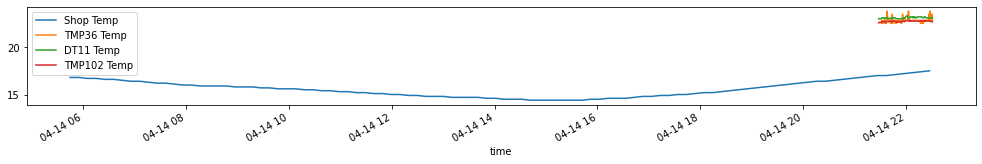

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import cmocean

fig, ax = plt.subplots(figsize=(17, 2))
ch1_pd.plot(ax=ax)
ch2_pd.plot(ax=ax)
ch3_pd.plot(ax=ax)
#ax.set_xlim(ch3_pd.index.min(), ch3_pd.index.max())


In [139]:
ch1_pd

,time,Shop Temp
time,,
2020-04-14 05:45:06+00:00,2020-04-14T05:45:06Z,16.8
2020-04-14 05:55:14+00:00,2020-04-14T05:55:14Z,16.8
2020-04-14 06:05:21+00:00,2020-04-14T06:05:21Z,16.7
2020-04-14 06:15:28+00:00,2020-04-14T06:15:28Z,16.7
2020-04-14 06:25:35+00:00,2020-04-14T06:25:35Z,16.6
...,...,...
2020-04-14 21:46:34+00:00,2020-04-14T21:46:34Z,17.1
2020-04-14 21:56:41+00:00,2020-04-14T21:56:41Z,17.2
2020-04-14 22:06:48+00:00,2020-04-14T22:06:48Z,17.3
